In [6]:
import cv2
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [23]:
seg_pred = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\preds-test-set\predicted_results_model7_pseudo3d_with_maps\NLDISALA0093_1_frame80_049.nii.gz')
seg_pred_data = sitk.GetArrayFromImage(seg_pred)

seg_orig = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task508_CardiacOCT\labelsTs\NLDISALA0093_1_frame80_049.nii.gz')
seg_orig_data = sitk.GetArrayFromImage(seg_orig)

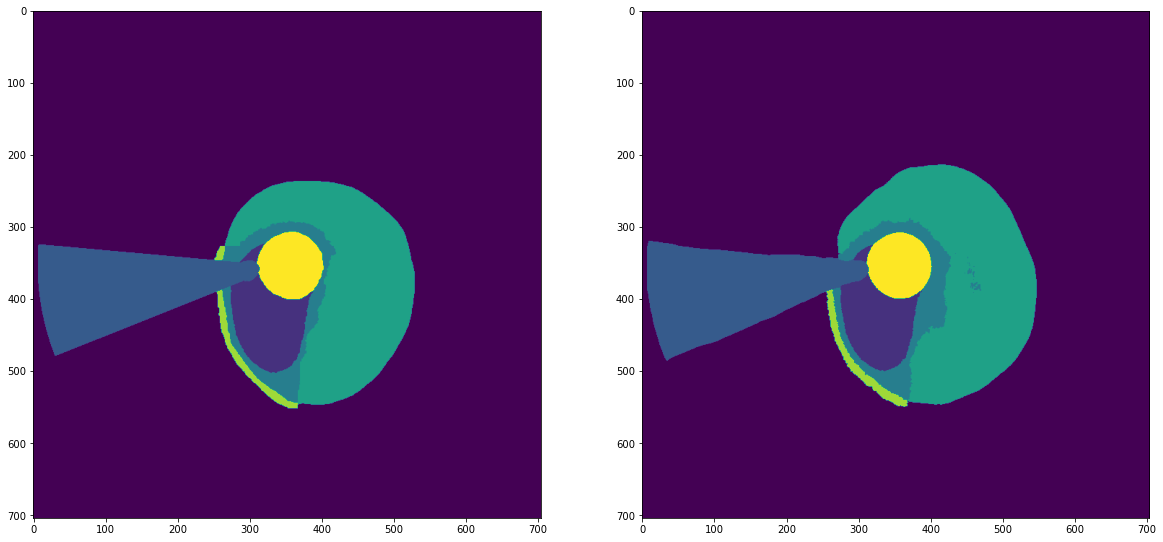

In [24]:
fig, axes = plt.subplots(1,2, figsize=(20,20))

axes[0].imshow(seg_orig_data[0])
axes[1].imshow(seg_pred_data[0])

In [28]:
def remove_weird_pixels(segmentation_map):
    # Label connected components
    num_labels, labels, _, _ = cv2.connectedComponentsWithStats(segmentation_map, connectivity=8)

    print(np.unique(labels))
    print(labels.shape)
    print(num_labels)

    # Analyze connected components
    components = {}
    for y in range(segmentation_map.shape[0]):
        for x in range(segmentation_map.shape[1]):
            label = labels[y, x]
            if label not in components:
                components[label] = {
                    'pixels': [(y, x)],
                    'count': 1
                }
            else:
                components[label]['pixels'].append((y, x))
                components[label]['count'] += 1

    # Correct labels within each connected component
    for label, info in components.items():
        majority_label = segmentation_map[tuple(zip(*info['pixels']))].mean()
        for y, x in info['pixels']:
            if segmentation_map[y, x] != majority_label:
                segmentation_map[y, x] = majority_label

    return segmentation_map

In [29]:
fixed_img = remove_weird_pixels(seg_pred_data[0])

[0 1]
(704, 704)


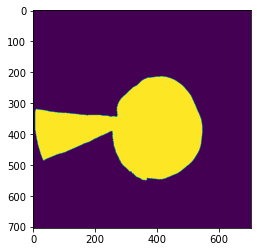

In [20]:
plt.imshow(fixed_img)